<a href="https://colab.research.google.com/github/rxgvnd/Machine-Learning/blob/master/W08_IraSuryani_31410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Ira Suryani Anggraini - 00000031410
#K-Means Clustering
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling
import numpy as np

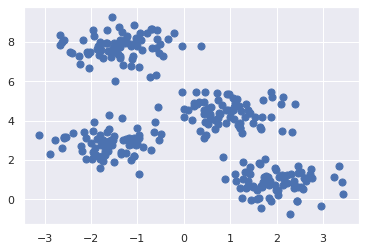

In [15]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

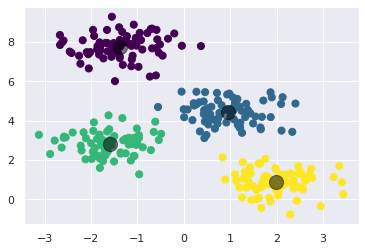

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

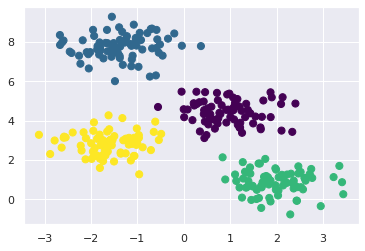

In [19]:
#K-Means Algorithm : Expectation-Maximization
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

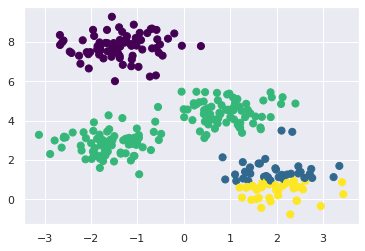

In [21]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

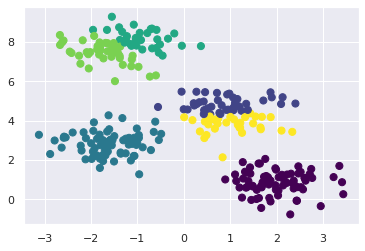

In [22]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

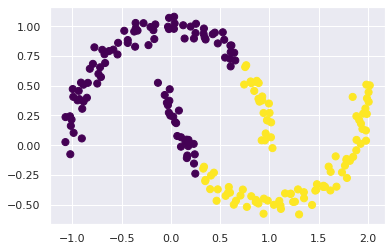

In [24]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


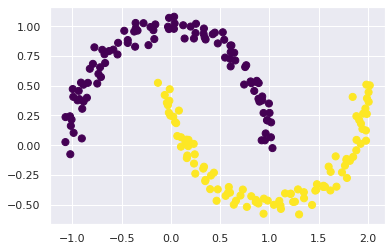

In [26]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [27]:
#Example: K-Means on Digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [29]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

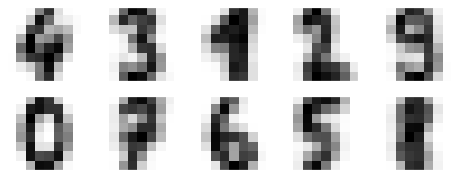

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [34]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
  mask = (clusters == i)
  labels[mask] = mode(digits.target[mask])[0]

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

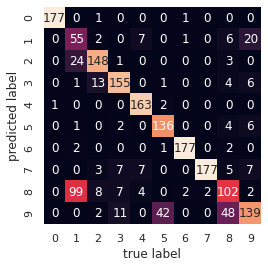

In [36]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

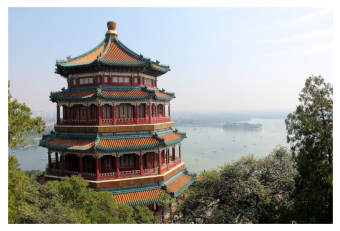

In [37]:
#Example: K-Means for color compression

from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [38]:
china.shape

(427, 640, 3)

In [39]:
data = china/255.0 #use 0 ... 1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [40]:
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data
  
  #choose a random subset
  rng = np.random.RandomState(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T

  fig, ax = plt.subplots(1, 2, figsize=(16,6))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

  fig.suptitle(title, size=20);

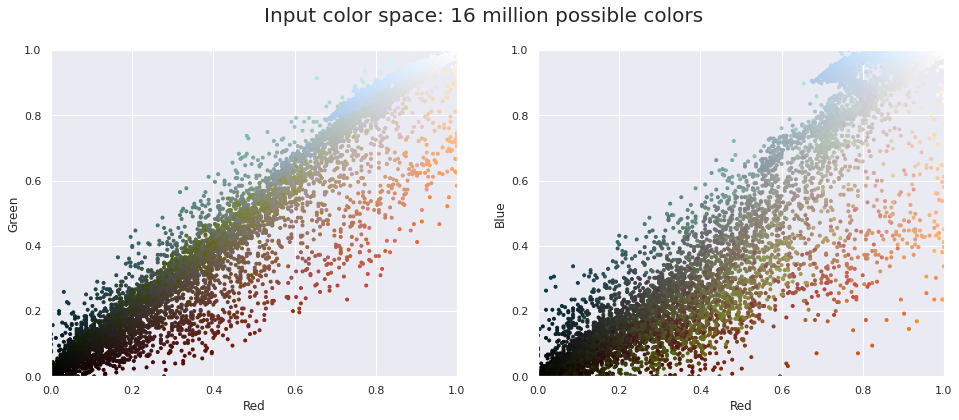

In [41]:
plot_pixels(data, title='Input color space: 16 million possible colors')

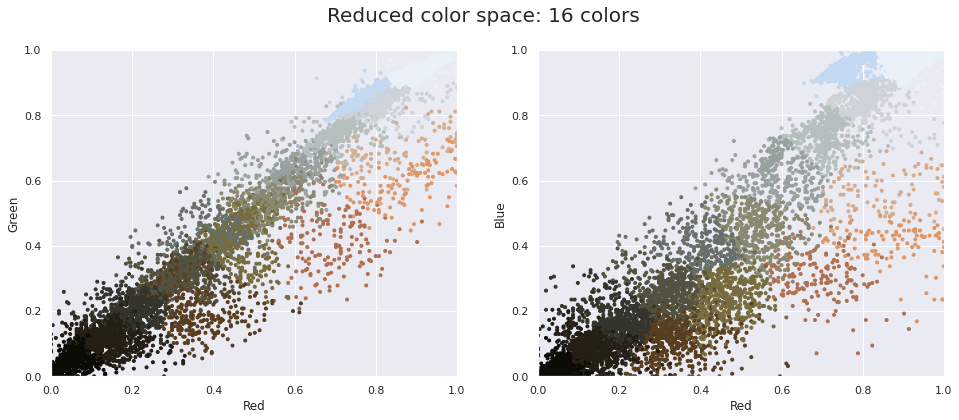

In [46]:
import warnings; warnings.simplefilter('ignore') #Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

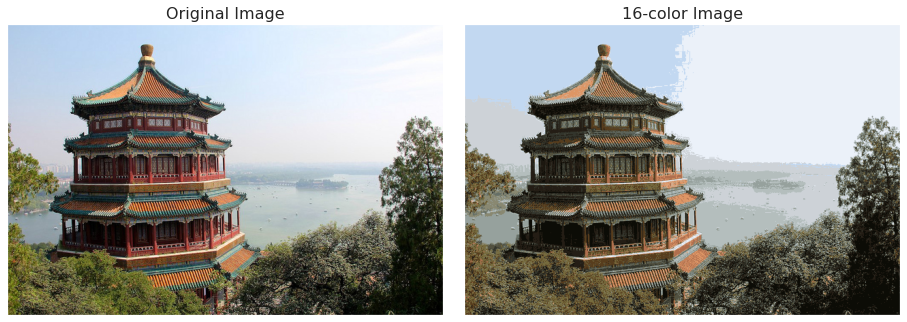

In [47]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

In [48]:
#K-Medoids Algorithm
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [49]:
#Dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

target = iris.target_names
labels = iris.target

In [51]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [53]:
#PCA Transformation
from sklearn.decomposition import PCA
pca = PCA (n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents , columns = ['principal component 1',
                                                             'principal component 2',
                                                             'principal component 3'])

datapoints = PCAdf.values
m, f = datapoints.shape
k=3
datapoints

array([[-6.30702931e-01,  1.07577910e-01, -1.87190977e-02],
       [-6.22904943e-01, -1.04259833e-01, -4.91420253e-02],
       [-6.69520395e-01, -5.14170597e-02,  1.96441728e-02],
       [-6.54152759e-01, -1.02884871e-01,  2.32185515e-02],
       [-6.48788056e-01,  1.33487576e-01,  1.51155243e-02],
       [-5.35272778e-01,  2.89615724e-01,  2.54378874e-02],
       [-6.56537790e-01,  1.07244911e-02,  9.18347789e-02],
       [-6.25780499e-01,  5.71335411e-02, -1.40277647e-02],
       [-6.75643504e-01, -2.00703283e-01,  3.59520802e-02],
       [-6.45644619e-01, -6.72080097e-02, -6.17055833e-02],
       [-5.97408238e-01,  2.17151953e-01, -5.12740810e-02],
       [-6.38943190e-01,  3.25988375e-02,  2.44981902e-02],
       [-6.61612593e-01, -1.15605495e-01, -5.47803418e-02],
       [-7.51967943e-01, -1.71313322e-01,  4.76777938e-02],
       [-6.00371589e-01,  3.80240692e-01, -8.51695344e-02],
       [-5.52157227e-01,  5.15255982e-01,  3.82732690e-02],
       [-5.77053593e-01,  2.93709492e-01

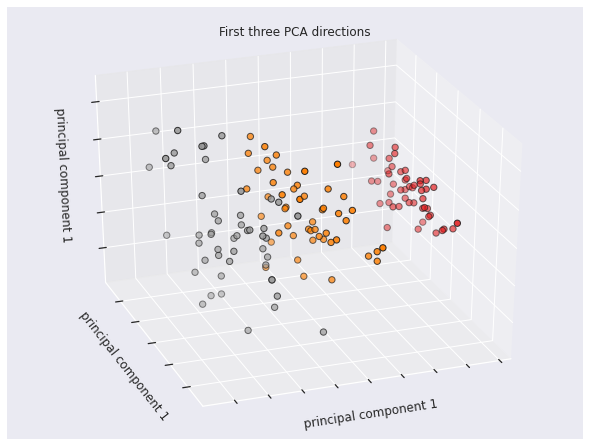

In [58]:
#Visualization
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [60]:
#Medoid Initialization
def init_medoids(X, k):
  from numpy.random import choice
  from numpy.random import seed

  seed(1)
  samples = choice(len(X), size=k, replace=False)
  return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)
medoids_initial

array([[-0.60037159,  0.38024069, -0.08516953],
       [-0.15863457, -0.28913985,  0.0524159 ],
       [ 0.21396272,  0.059963  , -0.11409813]])

In [62]:
#Computing the Distances

def compute_d_p(X, medoids, p):
  m = len(X)
  medoids_shape = medoids.shape
  #IF a 1-D array is provided,
  #if will be reshaped to a single row 2-D array
  if len(medoids_shape) == 1:
    medoids = medoids.reshape((1,len(medoids)))
  k = len(medoids)

  S = np.empty((m, k))

  for i in range(m):
    d_i = np.linalg.norm(X[i, :] - medoids, ord = p, axis = 1)
    S[i, :] = d_i**p

  return S

S = compute_d_p(datapoints, medoids_initial, 2)
S

array([[0.07968064, 0.3852937 , 0.7248244 ],
       [0.23654649, 0.26004161, 0.73153592],
       [0.20209589, 0.31859043, 0.81083493],
       [0.2480507 , 0.28108167, 0.79899978],
       [0.07328835, 0.42025569, 0.76644093],
       [0.02468474, 0.47754216, 0.6335645 ],
       [0.17102739, 0.33938008, 0.80260393],
       [0.11010499, 0.34254533, 0.71519075],
       [0.35783221, 0.27539032, 0.88186121],
       [0.20281054, 0.29945624, 0.75784222],
       [0.02775562, 0.45960533, 0.68697806],
       [0.13436964, 0.33499155, 0.74740623],
       [0.2505374 , 0.29459209, 0.80097502],
       [0.3448417 , 0.36595003, 1.01268223],
       [0.        , 0.66213165, 0.76655503],
       [0.03579188, 0.80211274, 0.81744851],
       [0.02127369, 0.51529454, 0.70108133],
       [0.08302796, 0.35731766, 0.68556492],
       [0.01509555, 0.47944961, 0.59289047],
       [0.0437377 , 0.46409076, 0.73404497],
       [0.0792879 , 0.33420167, 0.59754411],
       [0.06094364, 0.39785527, 0.67347669],
       [0.

In [64]:
#Cluster Assignment

def assign_labels(S):
  return np.argmin(S, axis=1)

labels = assign_labels(S)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
#Swap Test
def update_medoids(X, medoids, p):
  S = compute_d_p(datapoints, medoids, p)
  labels = assign_labels(S)

  out_medoids = medoids

  for i in set(labels):

    avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))

    cluster_points = datapoints[labels == i]

    for datap in cluster_points:
      new_medoid = datap
      new_dissimilarity = np.sum(compute_d_p(datapoints, datap, p))

      if new_dissimilarity < avg_dissimilarity:
        avg_dissimilarity = new_dissimilarity

        out_medoids[i] = datap
  return out_medoids

In [66]:
def has_converged(old_medoids, medoids):
  return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [68]:
#Putting all Together
#Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
  if starting_medoids is None:
    medoids = init_medoids(X, k)
  else:
    medoids = starting_medoids

  converged = False
  labels = np.zeros(len(X))
  i = 1
  while(not converged) and (i <= max_steps):
    old_medoids = medoids.copy()

    S = compute_d_p(X, medoids, p)

    labels = assign_labels(S)

    medoids = update_medoids(X, medoids, p)

    converged = has_converged(old_medoids, medoids)
    i += 1
  return (medoids, labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]
final_medoids
results

(array([[-0.50609386,  0.02794708,  0.02628302],
        [-0.00826092, -0.0866611 ,  0.05357911],
        [ 0.03302937, -0.04297085,  0.01560933]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
        2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
        2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [69]:
#Count
def mark_matches(a, b, exact=False):
  assert a.shape == b.shape
  a_int = a.astype(dtype=int)
  b_int = b.astype(dtype=int)
  all_axes = tuple(range(len(a.shape)))
  assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
  assert ((b_int == 0) | (b_int == 1) | (b_int == 2)).all()

  exact_matches = (a_int == b_int)
  if exact:
    return exact_matches

  assert exact == False
  num_exact_matches = np.sum(exact_matches)
  if(2*num_exact_matches) >= np.prod (a.shape):
    return exact_matches
  return exact_matches == False #Invert

In [70]:
def count_matches(a, b, exact = False):
  matches = mark_matches(a, b, exact=exact)
  return np.sum(matches)

n_matches = count_matches(labels, data['clusters'])
print(n_matches,
      "matches out of",
      len(data),
      "data points",
      "(~{:.1f}%)".format(100.0 * n_matches / len(labels)))

142 matches out of 150 data points (~94.7%)


In [71]:
#K-Modes Algorithm : Unsupervised Learning for Categorical Data
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing all required packages
import numpy as np
import pandas as pd

#Data viz Lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [75]:
bank = pd.read_csv('bankmarketing.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [76]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [78]:
#Importing Catagorical Columns
bank_cust = bank [['age', 'job', 'marital', 'education',
                   'default', 'housing', 'loan', 
                   'contact', 'month', 'day_of_week', 'poutcome']]

In [79]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [80]:
#Converting age into categorical variable
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0,20,30,40,50,60,70,80,90,100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
bank_cust = bank_cust.drop('age', axis = 1)

In [81]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [82]:
bank_cust.shape

(41188, 11)

In [83]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,9
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,16385


In [84]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [85]:
#Checking Null Values
bank_cust.isnull().sum()*100/bank_cust.shape[0]

job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
age_bin        0.0
dtype: float64

In [87]:
#First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

In [88]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [89]:
#Installing the kmodes to building the model
!pip install kmodes

In [90]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.7/dist-packages (0.11.0)


In [92]:
#Importing Libraries
from kmodes.kmodes import KModes

In [93]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose = 1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [94]:
#Predicted Clusters
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [95]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [96]:
#Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


In [97]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8091, cost: 199291.0
Run 1, iteration: 2/100, moves: 5859, cost: 199291.0


In [98]:
#Predicted clusters
fitClusters_huang

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [99]:
cost = []
for num_clusters in list(range(1,5)):
  kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init=1, verbose=1)
  kmode.fit_predict(bank_cust)
  cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


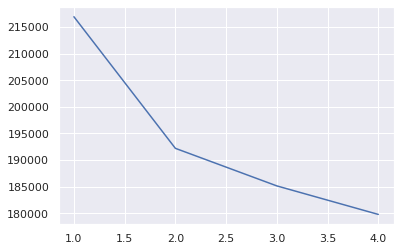

In [100]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y, cost)

In [101]:
##Choosing K=2
km_cao = KModes(n_clusters=2, init="Cao", n_init=1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [102]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [103]:
bank_cust = bank_cust_copy.reset_index()

In [104]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combineDf = pd.concat([bank_cust, clustersDf], axis=1).reset_index()
combineDf = combineDf.drop(['index', 'level_0'], axis=1)

In [105]:
combineDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,1


In [106]:
cluster_0 = combineDf[combineDf['cluster_predicted'] == 0]
cluster_1 = combineDf[combineDf['cluster_predicted'] == 1]

In [107]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                28293 non-null  object  
 1   marital            28293 non-null  object  
 2   education          28293 non-null  object  
 3   default            28293 non-null  object  
 4   housing            28293 non-null  object  
 5   loan               28293 non-null  object  
 6   contact            28293 non-null  object  
 7   month              28293 non-null  object  
 8   day_of_week        28293 non-null  object  
 9   poutcome           28293 non-null  object  
 10  age_bin            28293 non-null  category
 11  cluster_predicted  28293 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 2.5+ MB


In [108]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                12895 non-null  object  
 1   marital            12895 non-null  object  
 2   education          12895 non-null  object  
 3   default            12895 non-null  object  
 4   housing            12895 non-null  object  
 5   loan               12895 non-null  object  
 6   contact            12895 non-null  object  
 7   month              12895 non-null  object  
 8   day_of_week        12895 non-null  object  
 9   poutcome           12895 non-null  object  
 10  age_bin            12895 non-null  category
 11  cluster_predicted  12895 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 1.1+ MB


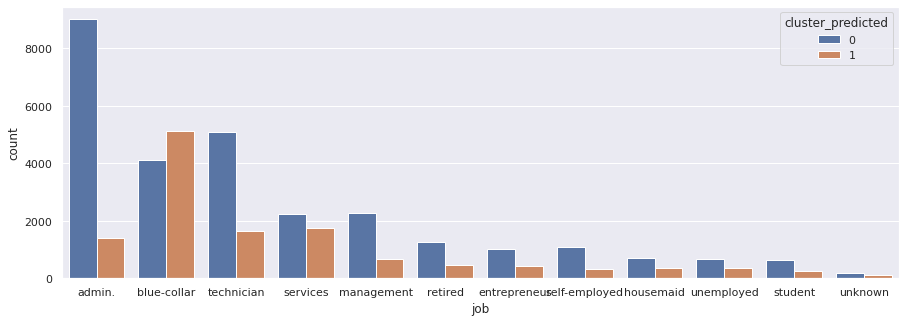

In [111]:
#Job
plt.subplots(figsize = (15,5))
sns.countplot(x=combineDf['job'],
              order=combineDf['job'].value_counts().index,hue=combineDf['cluster_predicted'])
plt.show()

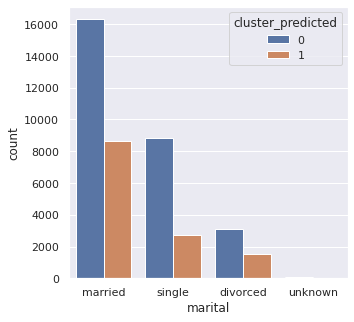

In [112]:
#Marital
plt.subplots(figsize = (5,5))
sns.countplot(x=combineDf['marital'],
              order=combineDf['marital'].value_counts().index,hue=combineDf['cluster_predicted'])
plt.show()

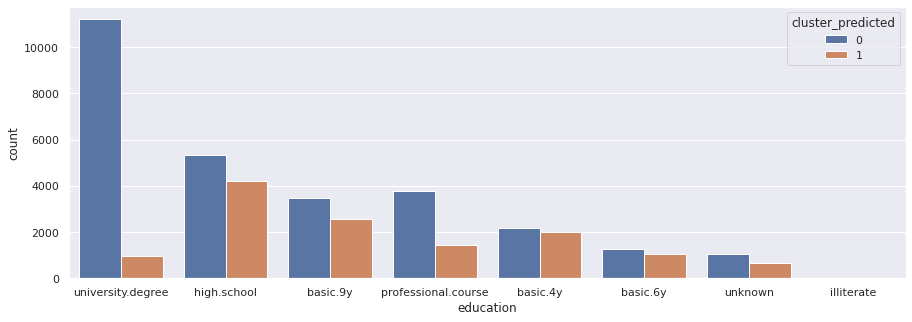

In [113]:
#Education
plt.subplots(figsize = (15,5))
sns.countplot(x=combineDf['education'],
              order=combineDf['education'].value_counts().index,hue=combineDf['cluster_predicted'])
plt.show()

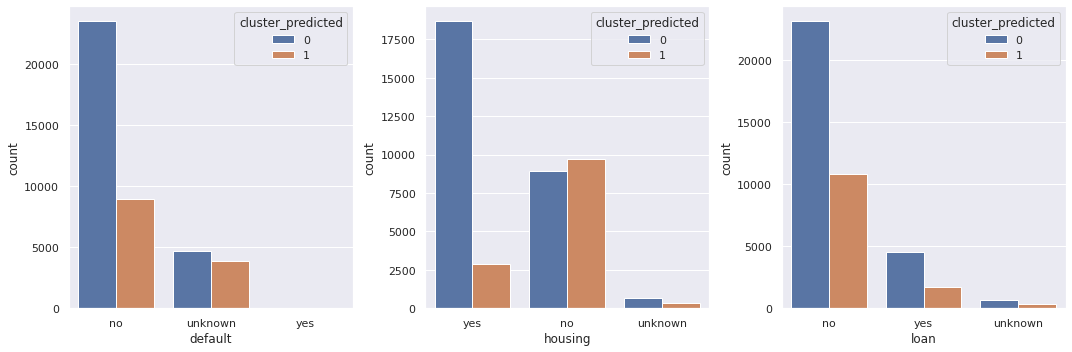

In [114]:
#Default
f, axs = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=combineDf['default'], 
              order=combineDf['default'].value_counts().index,hue=combineDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combineDf['housing'], 
              order=combineDf['housing'].value_counts().index,hue=combineDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combineDf['loan'], 
              order=combineDf['loan'].value_counts().index,hue=combineDf['cluster_predicted'],ax=axs[2])
plt.tight_layout()
plt.show()

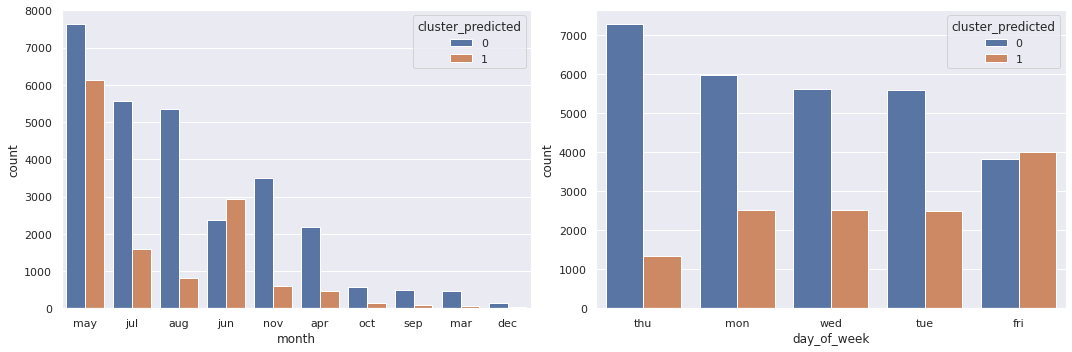

In [115]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combineDf['month'], 
              order=combineDf['month'].value_counts().index,hue=combineDf['cluster_predicted'], ax=axs[0])
sns.countplot(x=combineDf['day_of_week'], 
              order=combineDf['day_of_week'].value_counts().index,hue=combineDf['cluster_predicted'], ax=axs[1])
plt.tight_layout()
plt.show()

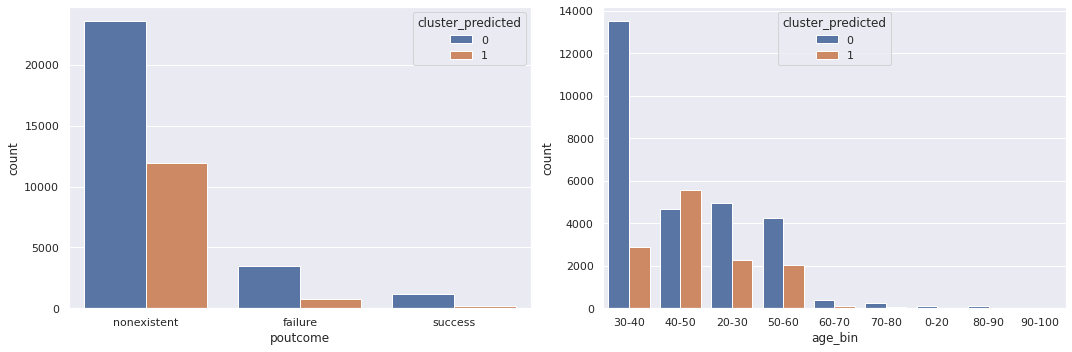

In [116]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combineDf['poutcome'], 
              order=combineDf['poutcome'].value_counts().index,hue=combineDf['cluster_predicted'], ax=axs[0])
sns.countplot(x=combineDf['age_bin'], 
              order=combineDf['age_bin'].value_counts().index,hue=combineDf['cluster_predicted'], ax=axs[1])
plt.tight_layout()
plt.show()